# Linear Model
[kleinml.linear_model](https://github.com/KazukiChiyo/kleinml/tree/master/linear_model)

## Linear regression
Linear model with least squares implementation.
```
linear_model.LinearRegression()
```

### Attributes
```
w: array
    Estimated weight of the linear model.
```

### Methods
`fit(X, y)`: Fit linear model.<br>
`predict(X)`: Predict a linear model.<br>
`score(X)`: Returns the coefficient of determination R^2 of the prediction.

### Example

Weight [33.4357871  10.76512296]
Score 0.8394596392789804


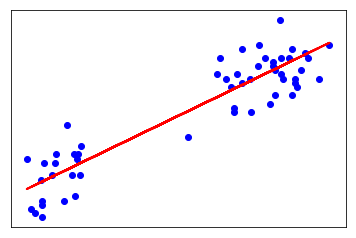

In [2]:
import sys
sys.path.append('../')
from linear_model.LinearRegression import LinearRegression
import util
import matplotlib.pyplot as plt

train_x, train_y, test_x, test_y = util.load_eruption()
model = LinearRegression()
model.fit(train_x, train_y)
pred_y = model.predict(test_x)
score = model.score(test_x, test_y)
print("Weight", model.w)
print("Score", score)
plt.scatter(test_x, test_y,  color='blue')
plt.plot(test_x, pred_y, color='red', linewidth=2)
plt.xticks(())
plt.yticks(())
plt.show()

## Ridge regression
Linear least squares with l2 regularization with mini-batch SGD.
```
linear_model.Ridge(alpha=0.1, shuffle=True, max_iter=1000, tol=0.0001, batch_size=16, learning_rate="constant", eta0=0.001, power_t=0.5)
```

### Parameters
```
alpha: float
    Strength of regularizaton and feature shrinkage.
shuffle: boolean
    Whether or not the training data should be shuffled after each epoch.
max_iter: int, optional
    Maximum number of iterations for gradient descent.
tol: float
    Precision of the solution.
batch_size: int
    Size of the batch at each iteration for mini-batch SGD.
learning_rate: string, optional
    The learning rate schedule:
    "constant": eta = eta0
    "invscaling": eta = eta0 / pow(t, power_t)
eta0: double, optional
    The initial learning rate.
power_t : double, optional
    The exponent for inverse scaling learning rate.
```

### Attributes
```
w: array
    Estimated weight of the linear model.
```

### Methods
`fit(X, y)`: Fit linear model.<br>
`predict(X)`: Predict a linear model.<br>
`score(X)`: Returns the coefficient of determination $R^2$ of the prediction.

### Example

Weight [10.60027183 17.30771394]
Score 0.7060833083650275


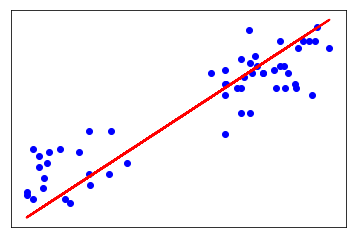

In [18]:
import sys
sys.path.append('../')
from linear_model.Ridge import Ridge
import util
import matplotlib.pyplot as plt

train_x, train_y, test_x, test_y = util.load_eruption()
model = Ridge(alpha=0.2, batch_size=1, learning_rate="constant", eta0=0.01)
model.fit(train_x, train_y)
pred_y = model.predict(test_x)
score = model.score(test_x, test_y)
print("Weight", model.w)
print("Score", score)
plt.scatter(test_x, test_y,  color='blue')
plt.plot(test_x, pred_y, color='red', linewidth=2)
plt.xticks(())
plt.yticks(())
plt.show()

## Lasso regression
Linear least squares with l1 regularization implementation (coordinate descent).
```
linear_model.Lasso(alpha=1.0, max_iter=1000)
```

### Parameters
```
alpha: float
    Strength of regularizaton and feature shrinkage.
max_iter: int, optional
    Maximum number of iterations for gradient descent.
```

### Attributes
```
w: array
    Estimated weight of the linear model.
```

### Methods
`fit(X, y)`: Fit linear model.<br>
`predict(X)`: Predict a linear model.<br>
`score(X)`: Returns the coefficient of determination $R^2$ of the prediction.

### Example

Weight [33.86285353 10.56737047]
Score 0.8807241115134311


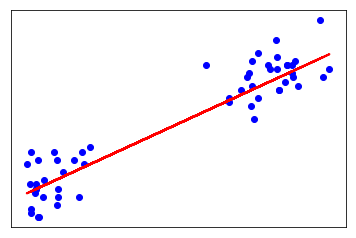

In [21]:
import sys
sys.path.append('../')
from linear_model.Lasso import Lasso
import util
import matplotlib.pyplot as plt

train_x, train_y, test_x, test_y = util.load_eruption()
model = Lasso(alpha=0.2)
model.fit(train_x, train_y)
pred_y = model.predict(test_x)
score = model.score(test_x, test_y)
print("Weight", model.w)
print("Score", score)
plt.scatter(test_x, test_y,  color='blue')
plt.plot(test_x, pred_y, color='red', linewidth=2)
plt.xticks(())
plt.yticks(())
plt.show()

## Logistic regression
Logistic regression with stochastic gradient descent.
```
linear_model.LogisticRegression(tol=0.001, max_iter=1000, eta0=1e-3)
```

### Parameters
```
tol: float
    Precision of the solution.
max_iter: int, optional
    Maximum number of iterations for gradient descent.
eta0: double, optional
    The initial learning rate.
```

### Methods
`fit(X, y)`: Fit the model according to the given training data.<br>
`predict(X)`: Predict class labels for samples in X.<br>

### Example

Weight [ 0.34394108 -5.00736907  1.81279128]
Confusion matrix
[[21 24]
 [ 5 39]]
Accuracy 0.6741573033707865


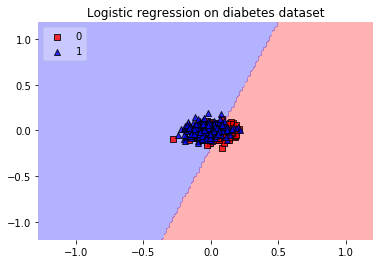

In [3]:
import sys
sys.path.append('../')
from linear_model.LogisticRegression import LogisticRegression
from decomposition.PCA import PCA
import util
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

train_x, train_y, test_x, test_y = util.load_diabetes()
pca = PCA(n_components=2)
pca.fit(train_x)
train_x = pca.transform(train_x)
test_x = pca.transform(test_x)
model = LogisticRegression()
model.fit(train_x, train_y)
pred = model.predict(test_x)
cm = util.confusion_matrix(test_y, pred)
print("Weight", model.w)
print("Confusion matrix")
print(cm)
print("Accuracy", util.accuracy(cm))
plot_decision_regions(train_x, train_y, clf=model, legend=2)
plt.title('Logistic regression on diabetes dataset')
plt.show()